<a href="https://colab.research.google.com/github/Sid-rocco/Sid-rocco/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
(trainX, trainY), (testX, testY) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print(f"Shape of Training data: {trainX.shape}, {trainY.shape}")
print(f"Shape of Testing data: {testX.shape}, {testY.shape}")

Shape of Training data: (50000, 32, 32, 3), (50000, 1)
Shape of Testing data: (10000, 32, 32, 3), (10000, 1)


In [4]:
no_classes = 10
input_class_shape = (32, 32, 3)
input_size = 32

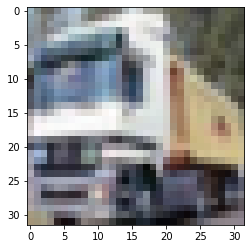

In [5]:
plt.imshow(trainX[1])

In [6]:
trainX = keras.utils.normalize(trainX, axis=1)
testX = keras.utils.normalize(testX, axis=1)

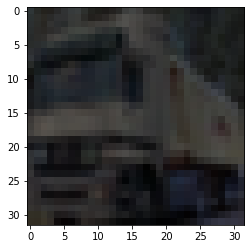

In [7]:
plt.imshow(trainX[1])

In [21]:
model = Sequential(
    [
     layers.Conv2D(32, (3,3), input_shape = input_class_shape, activation = "elu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(32, (3,3), input_shape = input_class_shape, activation = "elu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Dropout(0.3),
     layers.Conv2D(64, (3,3), input_shape = input_class_shape, activation = "elu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Dropout(0.4),

     layers.Flatten(),
     layers.Dense(64, activation = "elu"),
     layers.Dense(32, activation = "elu"),
     layers.Dense(no_classes, activation = "softmax"),
     
    ]
)


In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)         

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
model.fit(trainX, trainY, batch_size = 20, epochs = 100, validation_split=0.1, verbose=1)

Epoch 1/100
2250/2250 [==============================] - 13s 6ms/step - loss: 1.7088 - accuracy: 0.3826 - val_loss: 1.4529 - val_accuracy: 0.4788
Epoch 2/100
2250/2250 [==============================] - 13s 6ms/step - loss: 1.4436 - accuracy: 0.4842 - val_loss: 1.2973 - val_accuracy: 0.5298
Epoch 3/100
2250/2250 [==============================] - 12s 5ms/step - loss: 1.3476 - accuracy: 0.5202 - val_loss: 1.2464 - val_accuracy: 0.5588
Epoch 4/100
2250/2250 [==============================] - 12s 5ms/step - loss: 1.2840 - accuracy: 0.5425 - val_loss: 1.1016 - val_accuracy: 0.6154
Epoch 5/100
2250/2250 [==============================] - 12s 6ms/step - loss: 1.2375 - accuracy: 0.5588 - val_loss: 1.1111 - val_accuracy: 0.6110
Epoch 6/100
2250/2250 [==============================] - 12s 6ms/step - loss: 1.1941 - accuracy: 0.5771 - val_loss: 1.0495 - val_accuracy: 0.6350
Epoch 7/100
2250/2250 [==============================] - 12s 5ms/step - loss: 1.1605 - accuracy: 0.5897 - val_loss: 1.0092 -

In [24]:
score = model.evaluate(testX, testY)
print("Test loss: ", score[0])
print("Test acc: ", score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.7736 - accuracy: 0.7377
Test loss:  0.7735686898231506
Test acc:  0.7376999855041504
